In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

## 1. Importing the dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 2. Data Preprocessing

In [3]:
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values  #dependent variable vector

## 3. Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

## 4. Fitting linear regression model into the training set

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

LinearRegression()

## 5. Predicting the test set results

In [6]:
y_pred = regressor.predict(X_test) 
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

### Comaparison of Actual Y values and Predicted Y values

In [7]:
Test_result_df = pd.DataFrame(columns={'Y_actual','Y_Predict'})
Test_result_df['Y_actual']=y_test
Test_result_df['Y_Predict']=y_pred
Test_result_df

,Y_actual,Y_Predict
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


## Visualizing the results
### 1. Plotting the points (observations)
The X-axis will have years of experience and the Y-axis will have the predicted salaries.

plt.scatter plots a scatter plot of the data. Parameters include :
1. X – coordinate (X_train: number of years)
2. Y – coordinate (y_train: real salaries of the employees)
3. Color ( Regression line in red and observation line in blue)

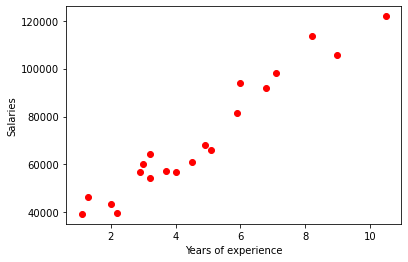

In [8]:
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

### 2. Plotting the regression line
plt.plot have the following parameters :

1. X coordinates (X_train) – number of years
2. Y coordinates (predict on X_train) – prediction of X-train (based on a number of years).

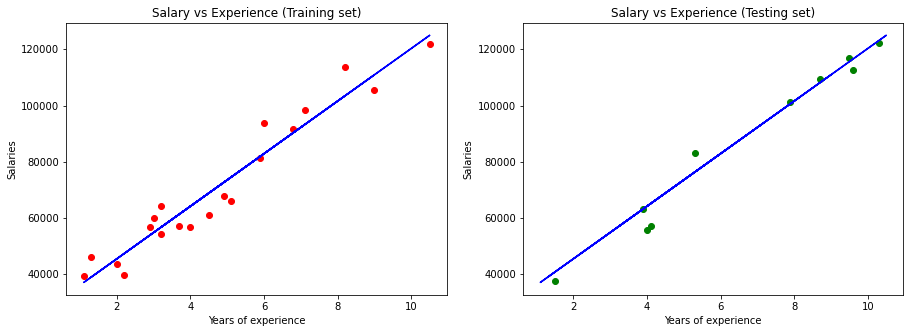

In [9]:
figure, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))

ax1.scatter(X_train, y_train, color='red') # plotting the observation line
ax1.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
ax1.set_xlabel("Years of experience") # adding the name of x-axis
ax1.set_ylabel("Salaries") # adding the name of y-axis
ax1.set_title("Salary vs Experience (Training set)")

ax2.scatter(X_test, y_test, color='green')
ax2.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
ax2.set_xlabel("Years of experience") # adding the name of x-axis
ax2.set_ylabel("Salaries") # adding the name of y-axis
ax2.set_title("Salary vs Experience (Testing set)")

plt.show() 

In [10]:
print("Coefficient of Determination", regressor.score(X_train,y_train))
print("Intercept", regressor.intercept_)
print("Slope", regressor.coef_)

Coefficient of Determination 0.9381900012894278
Intercept 26816.19224403119
Slope [9345.94244312]


## Measure the performance of model

In [11]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3426.4269374307123
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R-Squared: 0.9749154407708353
